![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import zipfile
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [ ]:
df.shape

(541462, 3)

<Axes: >

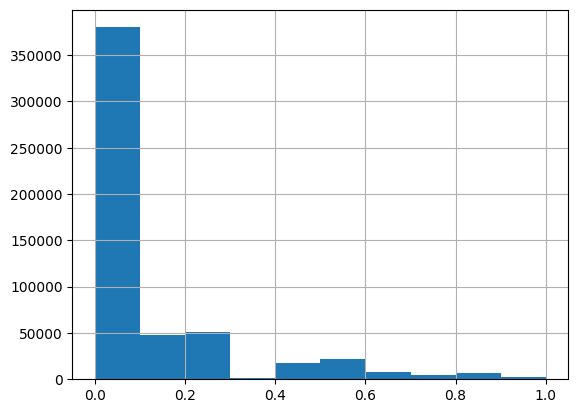

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [4]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [5]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [6]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [7]:
# Celda 1
vect_1 = CountVectorizer()
X_train_dtm_1 = vect_1.fit_transform(X_train)
X_test_dtm_1 = vect_1.transform(X_test)

### Modelo
model = XGBRegressor()
model.fit(X_train_dtm_1, y_train)

### Predicción
y_pred=model.predict(X_test_dtm_1)

### MSE y R cuadrado
mse_1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE) del punto 1:", mse_1)
print("Coeficiente de determinación (R^2) del punto 1:", r2_1)

Error cuadrático medio (MSE) del punto 1: 0.020689791583810714
Coeficiente de determinación (R^2) del punto 1: 0.4699489081371663


El modelo obtiene un MSE de 0.0207 y un $R^2$ de 46.699%.  Estos resultados indican que el modelo tiene un MSE relativamente bajo, lo que sugiere que las predicciones del modelo están bastante cerca de los valores reales en promedio. Sin embargo, el $R^2$ relativamente bajo indica que el modelo no explica toda la variabilidad en los datos, lo que sugiere que podría haber espacio para mejoras en el modelo.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
df_sample = df.sample(frac=0.1, random_state=42)



# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Inicialización de CountVectorizer con trigramas
vect_2 = CountVectorizer(ngram_range=(1, 3))

# Transformar los conjuntos de entrenamiento y prueba
X_train_dtm_2 = vect_2.fit_transform(X_train)
X_test_dtm_2 = vect_2.transform(X_test)

# Inicialización y entrenamiento del modelo XGBRegressor
model_2 = XGBRegressor()
model_2.fit(X_train_dtm_2, y_train)

# Predicción
y_pred_2 = model_2.predict(X_test_dtm_2)

# Cálculo de MSE
mse_2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)
print(f"Error cuadrático medio (MSE) : {mse_2}")
print(f"Coeficiente de determinación (R^2) : {r2_2}")


Error cuadrático medio (MSE) : 0.022152865241148754
Coeficiente de determinación (R^2) : 0.4398940958600315


Con un valor aproximadamente de 0.4398, el R² nos indica qué tan bien las variables independientes predicen la variable dependiente. En este caso, el modelo explica alrededor del 44% de la variabilidad, lo que sugiere un ajuste moderado.

El MSE ha aumentado ligeramente al utilizar trigramas comparado con la configuración anterior, lo que podría indicar un ajuste menos preciso al conjunto de datos. Esto podría deberse a la mayor complejidad del modelo al incluir trigramas, lo que puede llevar a sobreajuste o simplemente a una representación menos eficaz para este conjunto particular de datos.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

In [ ]:
#Celda 3


**TfidfVectorizer** es una técnica de vectorización de texto que se utiliza comúnmente en el procesamiento de lenguaje natural (NLP) para convertir una colección de documentos de texto en una representación numérica.

1. **Frecuencia de términos (TF):** TF mide la frecuencia de un término en un texto. Cuanto más frecuente sea un término en el texto, mayor será su valor TF para ese texto.

$$TF(t,d)=\frac{numero~de~veces~que~t~aparece~en~d}{total~de~terminos~en~d}$$

2. **Frecuencia inversa de documento (IDF):** IDF mide la importancia de un término en el conjunto de textos. Los términos que aparecen en muchos textos tendrán un IDF más bajo, mientras que los términos que aparecen en pocos textos tendrán un IDF más alto. Esto se calcula tomando el logaritmo del inverso de la frecuencia del documento que contiene el término y luego agregando 1 para evitar la división por cero.

$$IDF(t)=log \frac{1+n}{1+df(t)}+1 $$

3. **TF-IDF**: La ponderación TF-IDF combina TF y IDF para calcular un valor ponderado para cada término en cada documento. Esto se hace multiplicando la frecuencia del término (TF) por la frecuencia inversa del documento (IDF).

$$TF - IDF(t,d)= TF(t,d)*IDF(t) $$

**Ventajas de usar TfidfVectorizer**

* TfidfVectorizer tiene en cuenta no solo la frecuencia de los términos en un documento, sino también la importancia de esos términos en el conjunto de documentos. Esto puede ayudar a dar más peso a los términos que son únicos o raros en el corpus.

* Los términos que aparecen en muchos documentos suelen ser palabras comunes que pueden no ser muy informativas, reduciendi el peso de estos términos comunes asignándoles un valor IDF más bajo.

* Esta metodología también normaliza las frecuencias de términos por la longitud del documento, lo que puede ayudar a manejar la variación en la longitud de los documentos.

**Algunas desventajas potenciales:**


* Los valores TF-IDF no son tan intuitivos como simplemente contar la frecuencia de términos, generando una reducción en la interpretación para algunos casos.

* El cálculo de los valores TF-IDF puede ser más costoso computacionalmente en comparación con CountVectorizer, especialmente para corpus grandes.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
# Inicializar TfidfVectorizer
tfidf_vect = TfidfVectorizer()

# Transformar los conjuntos de entrenamiento y prueba
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# Inicializar y entrenar el modelo XGBRegressor
model = XGBRegressor()
model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_test_tfidf)

# Calcular MSE y R cuadrado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.020335956149285114, 0.47901380652680536)

El MSE obtenido es aproximadamente 0.02, lo que indica el promedio de los cuadrados de las diferencias entre los valores observados reales (toxicidad real de los comentarios) y las predicciones realizadas por el modelo. Un MSE de 0.02 puede considerarse razonablemente bajO.

El coeficiente R cuadrado es aproximadamente 0.479, lo que representa la proporción de la variación de la variable dependiente que es predecible a partir de las variables independientes, es decir, alrededor del 48% de la variabilidad de la toxicidad puede ser explicada por el modelo.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

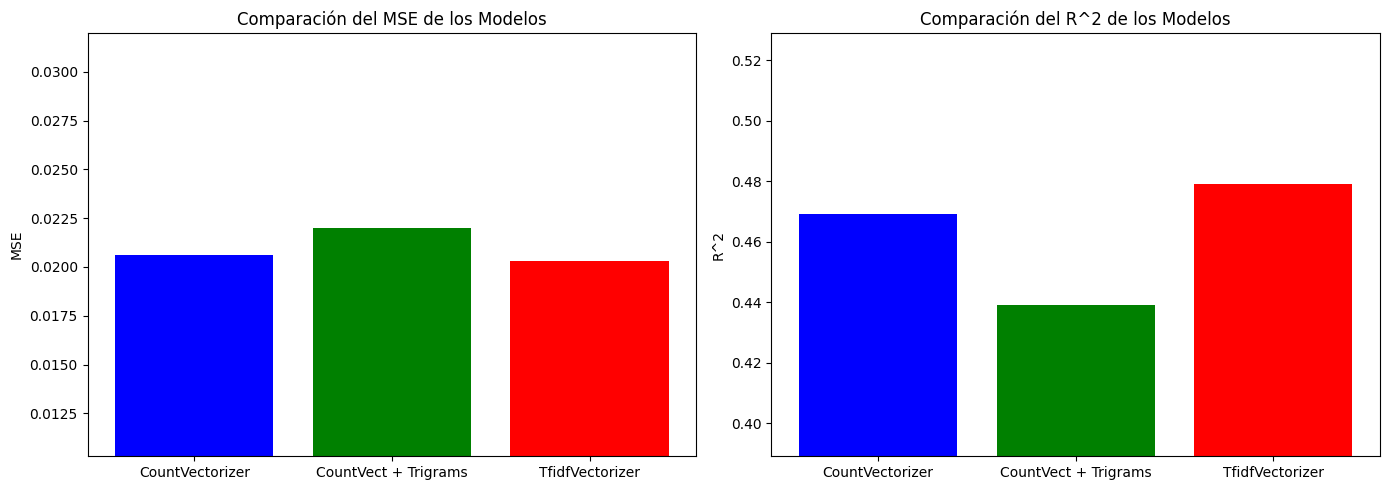

In [10]:
# Celda 5

import matplotlib.pyplot as plt

mse_scores = [mse_1, mse_2, mse]
r2_scores = [r2_1, r2_2, r2]


model_labels = ['CountVectorizer', 'CountVect + Trigrams', 'TfidfVectorizer']

# Creación de las gráficas
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica para MSE
ax[0].bar(model_labels, mse_scores, color=['blue', 'green', 'red'])
ax[0].set_title('Comparación del MSE de los Modelos')
ax[0].set_ylabel('MSE')
ax[0].set_ylim([min(mse_scores) - 0.01, max(mse_scores) + 0.01])

# Gráfica para R^2
ax[1].bar(model_labels, r2_scores, color=['blue', 'green', 'red'])
ax[1].set_title('Comparación del R^2 de los Modelos')
ax[1].set_ylabel('R^2')
ax[1].set_ylim([min(r2_scores) - 0.05, max(r2_scores) + 0.05])

# Mostrar las gráficas
plt.tight_layout()
plt.show()


La tokenización con TfidfVectorizer y la tokenización básica con CountVectorizer  tienen un rendimiento similar según el MSE, pero el modelo del Punto 4 tiene un R^2 ligeramente superior. Esto sugiere que el enfoque Tfidf podría estar proporcionando una representación ligeramente más efectiva de los datos de texto para este problema en particular, lo que resulta en una mejor explicación de la variabilidad de la respuesta por el modelo.

La inclusión de trigramas  resultó en un MSE más alto y un R^2 más bajo en comparación con los otros dos modelos. Esto podría indicar que los trigramas, aunque capturan mejor el contexto en los datos, podrían estar añadiendo complejidad al modelo sin mejorar necesariamente la predicción. También es posible que estén introduciendo ruido o que el modelo sufra de sobreajuste debido a la alta dimensionalidad.